In [ ]:
#LOGISTIC REGRESSION

In [ ]:
#1. Data Exploration:

In [ ]:
#a. Load the dataset and perform exploratory data analysis (EDA).

In [1]:
import pandas as pd
df= pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
df.shape

(768, 9)

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Applying box plot,finding outliers and removing outliers and replacing them with their nearest whisker length values.

In [6]:
df["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [7]:
df["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<Axes: >

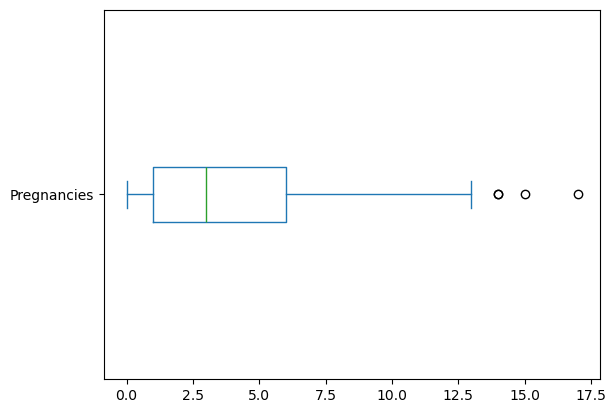

In [8]:
df["Pregnancies"].plot(kind='box',vert=False)

In [9]:
import numpy as np
q1=np.percentile(df["Pregnancies"],25)
q2=np.percentile(df["Pregnancies"],50)
q3=np.percentile(df["Pregnancies"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 5.0
Upper whisker length is 13.5
Lower whisker length is -6.5


In [10]:
len(df[df["Pregnancies"]>uw])

4

In [11]:
df.loc[df["Pregnancies"]>uw,"Pregnancies"]=uw

C:\Users\andeb\AppData\Local\Temp\ipykernel_6340\171149053.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Pregnancies"]>uw,"Pregnancies"]=uw


<Axes: >

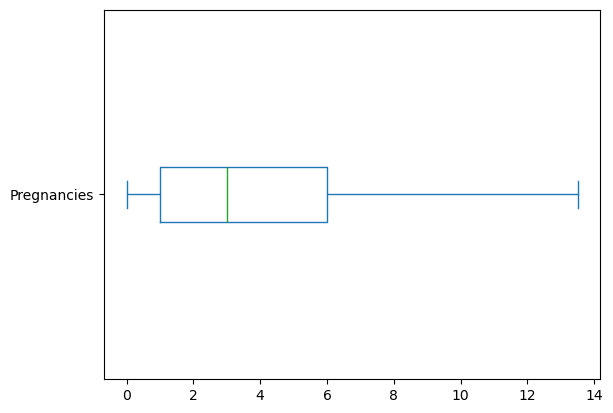

In [12]:
df["Pregnancies"].plot(kind='box',vert=False)

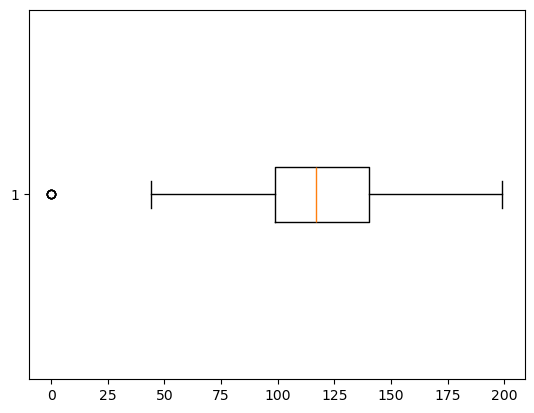

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df["Glucose"],vert=False)
plt.show()

In [14]:
q1=np.percentile(df["Glucose"],25)
q2=np.percentile(df["Glucose"],50)
q3=np.percentile(df["Glucose"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 41.25
Upper whisker length is 202.125
Lower whisker length is 37.125


In [15]:
len(df[df["Glucose"]<lw])

5

In [16]:
df.loc[df["Glucose"]<lw,"Glucose"]=lw

C:\Users\andeb\AppData\Local\Temp\ipykernel_6340\3688644036.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Glucose"]<lw,"Glucose"]=lw


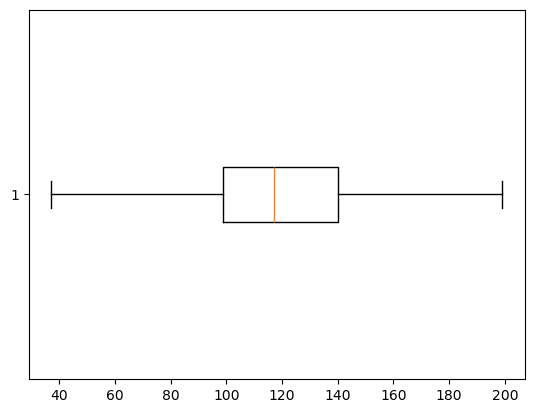

In [17]:
plt.boxplot(df["Glucose"],vert=False)
plt.show()

<Axes: >

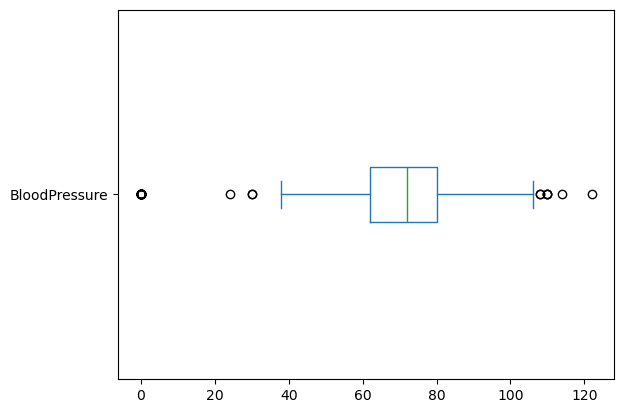

In [18]:
df["BloodPressure"].plot(kind="box",vert=False)

In [19]:
q1=np.percentile(df["BloodPressure"],25)
q2=np.percentile(df["BloodPressure"],50)
q3=np.percentile(df["BloodPressure"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 18.0
Upper whisker length is 107.0
Lower whisker length is 35.0


In [20]:
len(df[df["BloodPressure"]>uw])

7

In [21]:
len(df[df["BloodPressure"]<lw])

38

In [22]:
df.loc[df["BloodPressure"]>uw,"BloodPressure"]=uw

In [23]:
df.loc[df["BloodPressure"]<lw,"BloodPressure"]=lw

<Axes: >

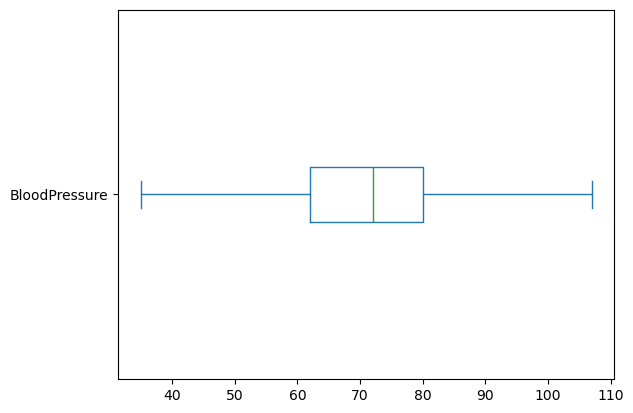

In [24]:
df["BloodPressure"].plot(kind="box",vert=False)

<Axes: >

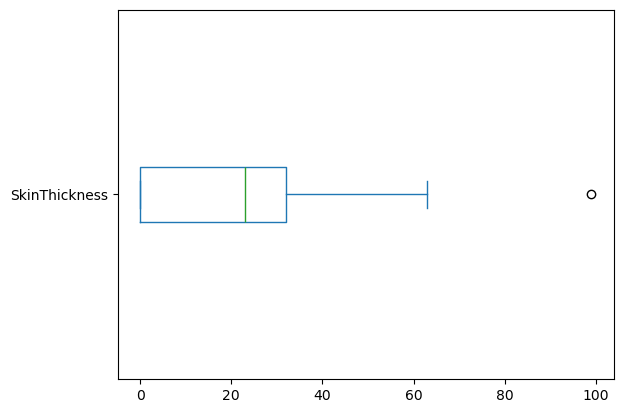

In [25]:
df["SkinThickness"].plot(kind="box",vert=False)

In [26]:
q1=np.percentile(df["SkinThickness"],25)
q2=np.percentile(df["SkinThickness"],50)
q3=np.percentile(df["SkinThickness"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 32.0
Upper whisker length is 80.0
Lower whisker length is -48.0


In [27]:
len(df[df["SkinThickness"]>uw])

1

In [28]:
df.loc[df["SkinThickness"]>uw,"SkinThickness"]=uw

<Axes: >

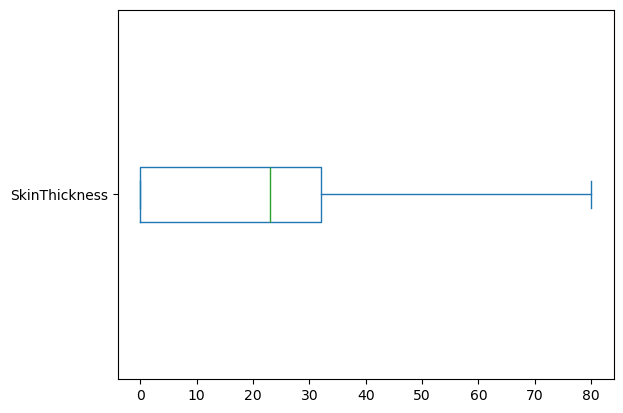

In [29]:
df["SkinThickness"].plot(kind="box",vert=False)

<Axes: >

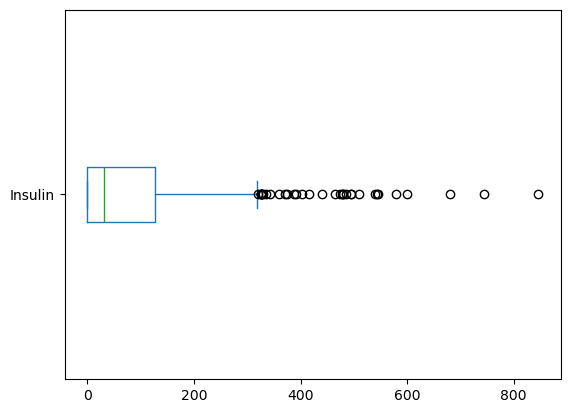

In [30]:
df["Insulin"].plot(kind="box",vert=False)

In [31]:
q1=np.percentile(df["Insulin"],25)
q2=np.percentile(df["Insulin"],50)
q3=np.percentile(df["Insulin"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 127.25
Upper whisker length is 318.125
Lower whisker length is -190.875


In [32]:
len(df[df["Insulin"]>uw])

34

In [33]:
df.loc[df["Insulin"]>uw,"Insulin"]=uw

C:\Users\andeb\AppData\Local\Temp\ipykernel_6340\517562290.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Insulin"]>uw,"Insulin"]=uw


<Axes: >

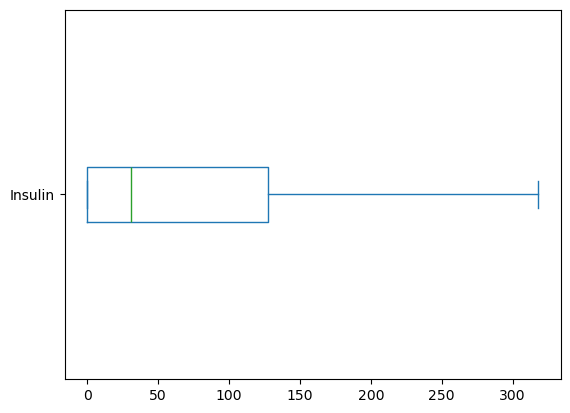

In [34]:
df["Insulin"].plot(kind="box",vert=False)

<Axes: >

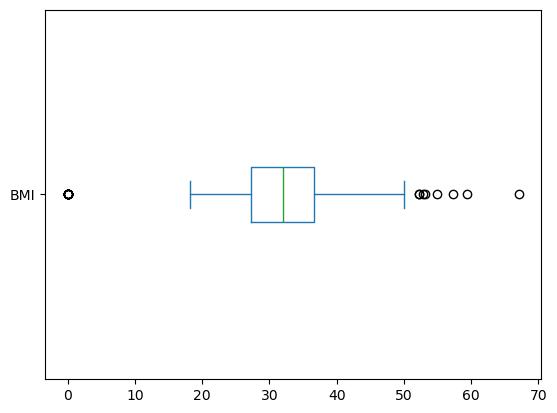

In [35]:
df["BMI"].plot(kind="box",vert=False)

In [36]:
q1=np.percentile(df["BMI"],25)
q2=np.percentile(df["BMI"],50)
q3=np.percentile(df["BMI"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 9.3
Upper whisker length is 50.550000000000004
Lower whisker length is 13.35


In [37]:
len(df[df["BMI"]>uw])

8

In [38]:
len(df[df["BMI"]<lw])

11

In [39]:
df.loc[df["BMI"]>uw,"BMI"]=uw

In [40]:
df.loc[df["BMI"]<lw,"BMI"]=lw

<Axes: >

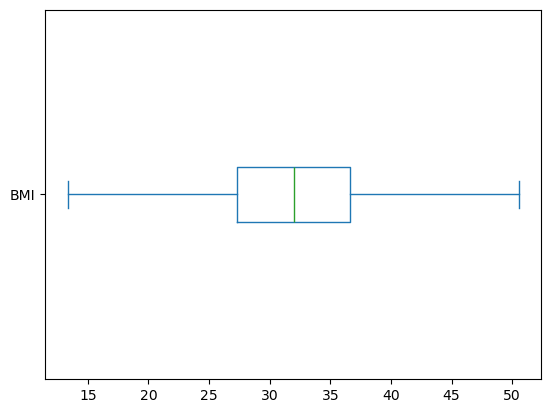

In [41]:
df["BMI"].plot(kind="box",vert=False)

<Axes: >

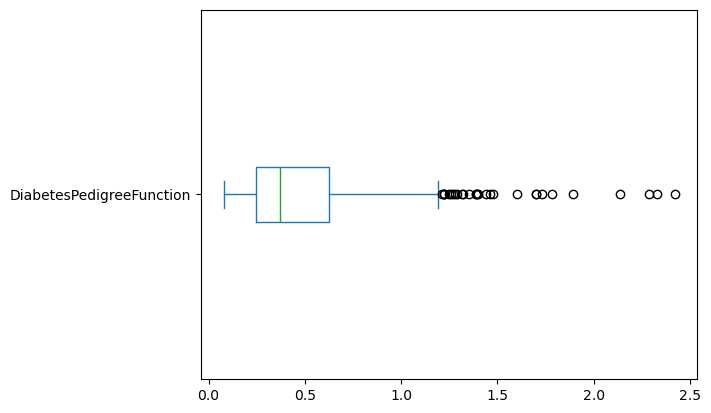

In [42]:
df["DiabetesPedigreeFunction"].plot(kind="box",vert=False)

In [43]:
q1=np.percentile(df["DiabetesPedigreeFunction"],25)
q2=np.percentile(df["DiabetesPedigreeFunction"],50)
q3=np.percentile(df["DiabetesPedigreeFunction"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 0.38249999999999995
Upper whisker length is 1.2
Lower whisker length is -0.32999999999999996


In [44]:
len(df[df["DiabetesPedigreeFunction"]>uw])

29

In [45]:
df.loc[df["DiabetesPedigreeFunction"]>uw,"DiabetesPedigreeFunction"]=uw

<Axes: >

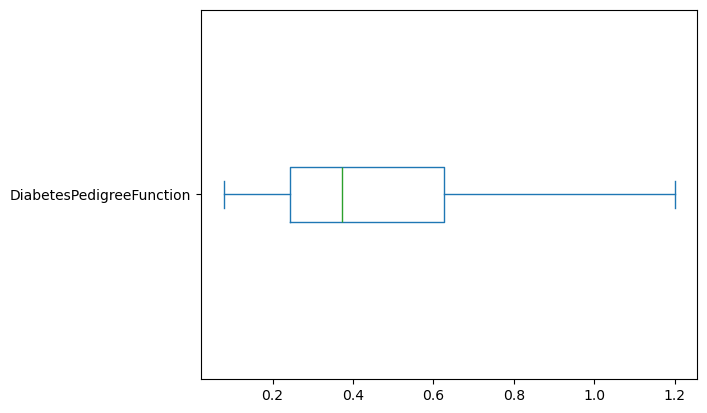

In [46]:
df["DiabetesPedigreeFunction"].plot(kind="box",vert=False)

<Axes: >

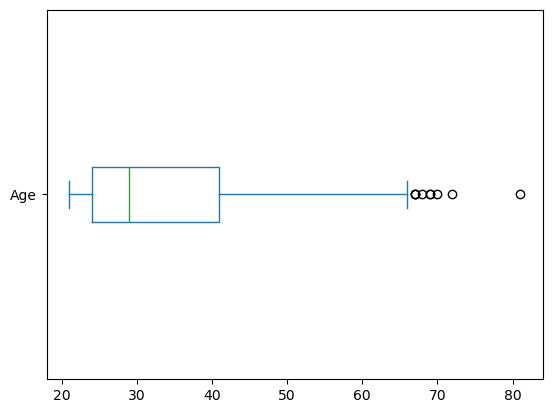

In [47]:
df["Age"].plot(kind="box",vert=False)

In [48]:
q1=np.percentile(df["Age"],25)
q2=np.percentile(df["Age"],50)
q3=np.percentile(df["Age"],75)
IQR=q3-q1
uw=q3+(IQR*1.5)
lw=q1-(IQR*1.5)
print(f"IQR is {IQR}")
print(f"Upper whisker length is {uw}")
print(f"Lower whisker length is {lw}")

IQR is 17.0
Upper whisker length is 66.5
Lower whisker length is -1.5


In [49]:
len(df[df["Age"]>uw])

9

In [50]:
df.loc[df["Age"]>uw,"Age"]=uw

C:\Users\andeb\AppData\Local\Temp\ipykernel_6340\2957816811.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Age"]>uw,"Age"]=uw


<Axes: >

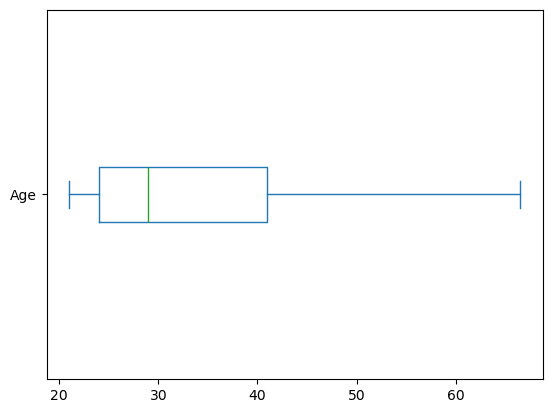

In [51]:
df["Age"].plot(kind="box",vert=False)

In [52]:
#b. Examine the features, their types, and summary statistics.

In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [54]:
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features

In [55]:
# Histograms for all variables in the given data set.

<Axes: >

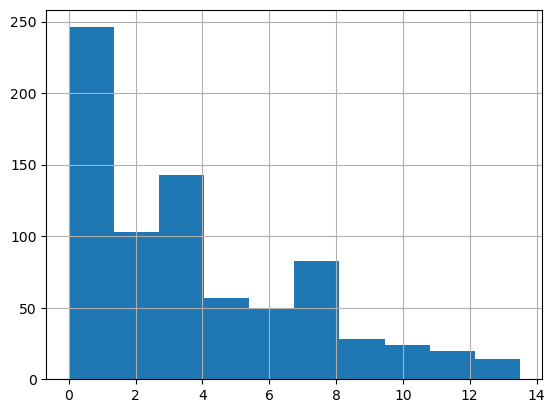

In [56]:
df["Pregnancies"].hist()

In [57]:
#Pregnancies column is having postive skewness

<Axes: >

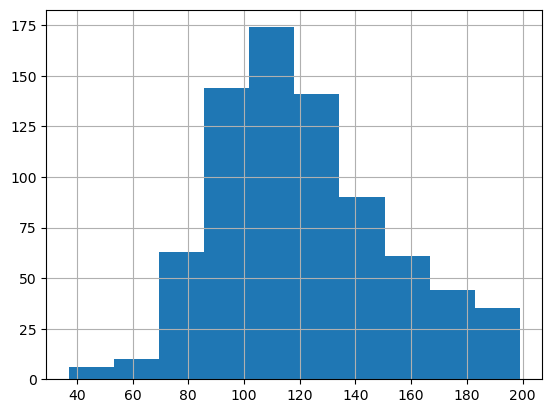

In [58]:
df["Glucose"].hist()

In [59]:
# Glucose column is having symmetrical distribution.

<Axes: >

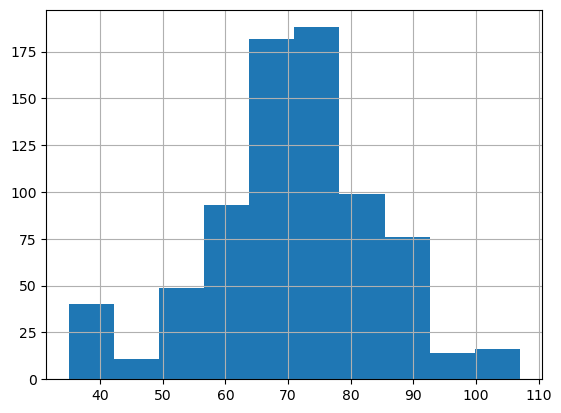

In [60]:
df["BloodPressure"].hist()

In [61]:
# BloodPressure column is having symmetrical distribution.

<Axes: >

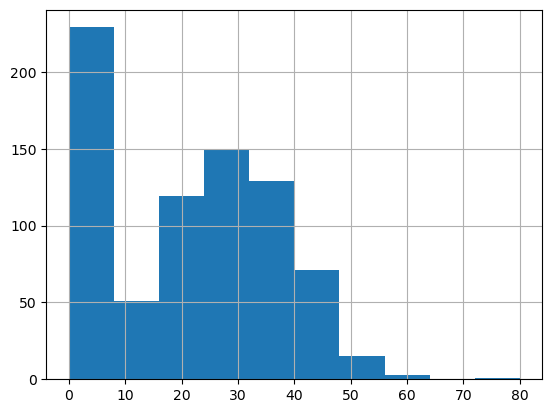

In [62]:
df["SkinThickness"].hist()

In [63]:
# SkinThickness column is having postive skewness

<Axes: >

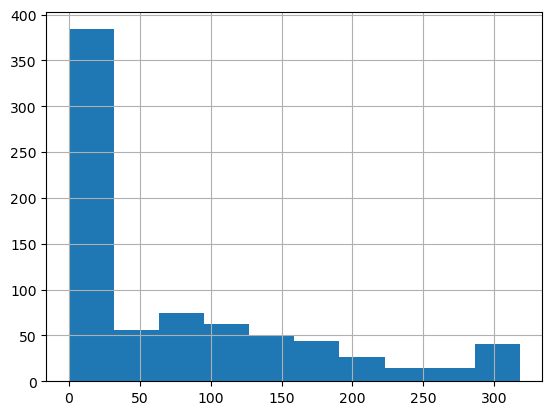

In [64]:
df["Insulin"].hist()

In [65]:
# Insulin column is having postive skewness

<Axes: >

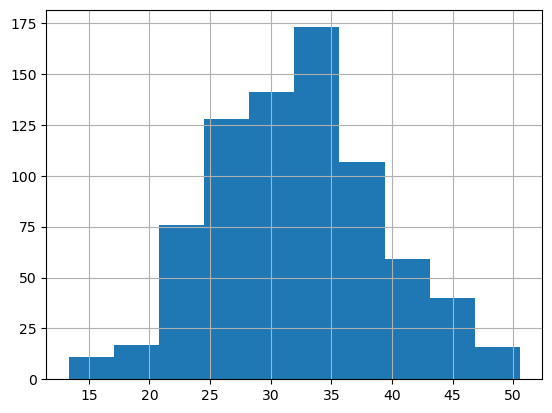

In [66]:
df["BMI"].hist()

In [67]:
# BMI column is having symmetrical distribution.

<Axes: >

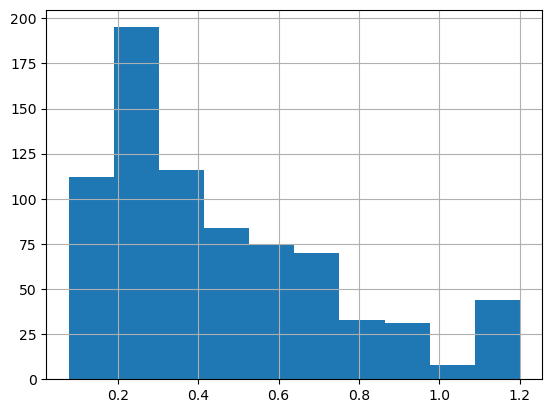

In [68]:
df["DiabetesPedigreeFunction"].hist()

In [69]:
# DiabetesPedigreeFunction column is having postive skewness

<Axes: >

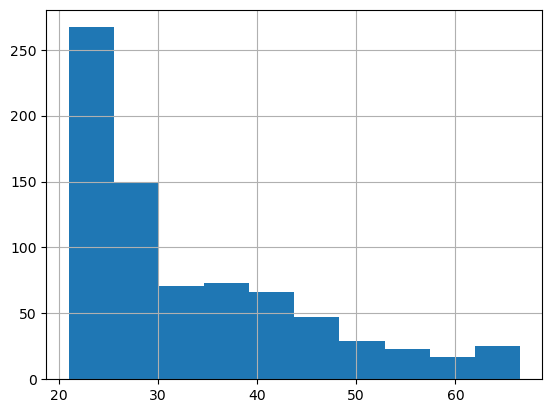

In [70]:
df["Age"].hist()

In [71]:
# Age column is having postive skewness

In [72]:
# Pair plots for all variablels in the data set.

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

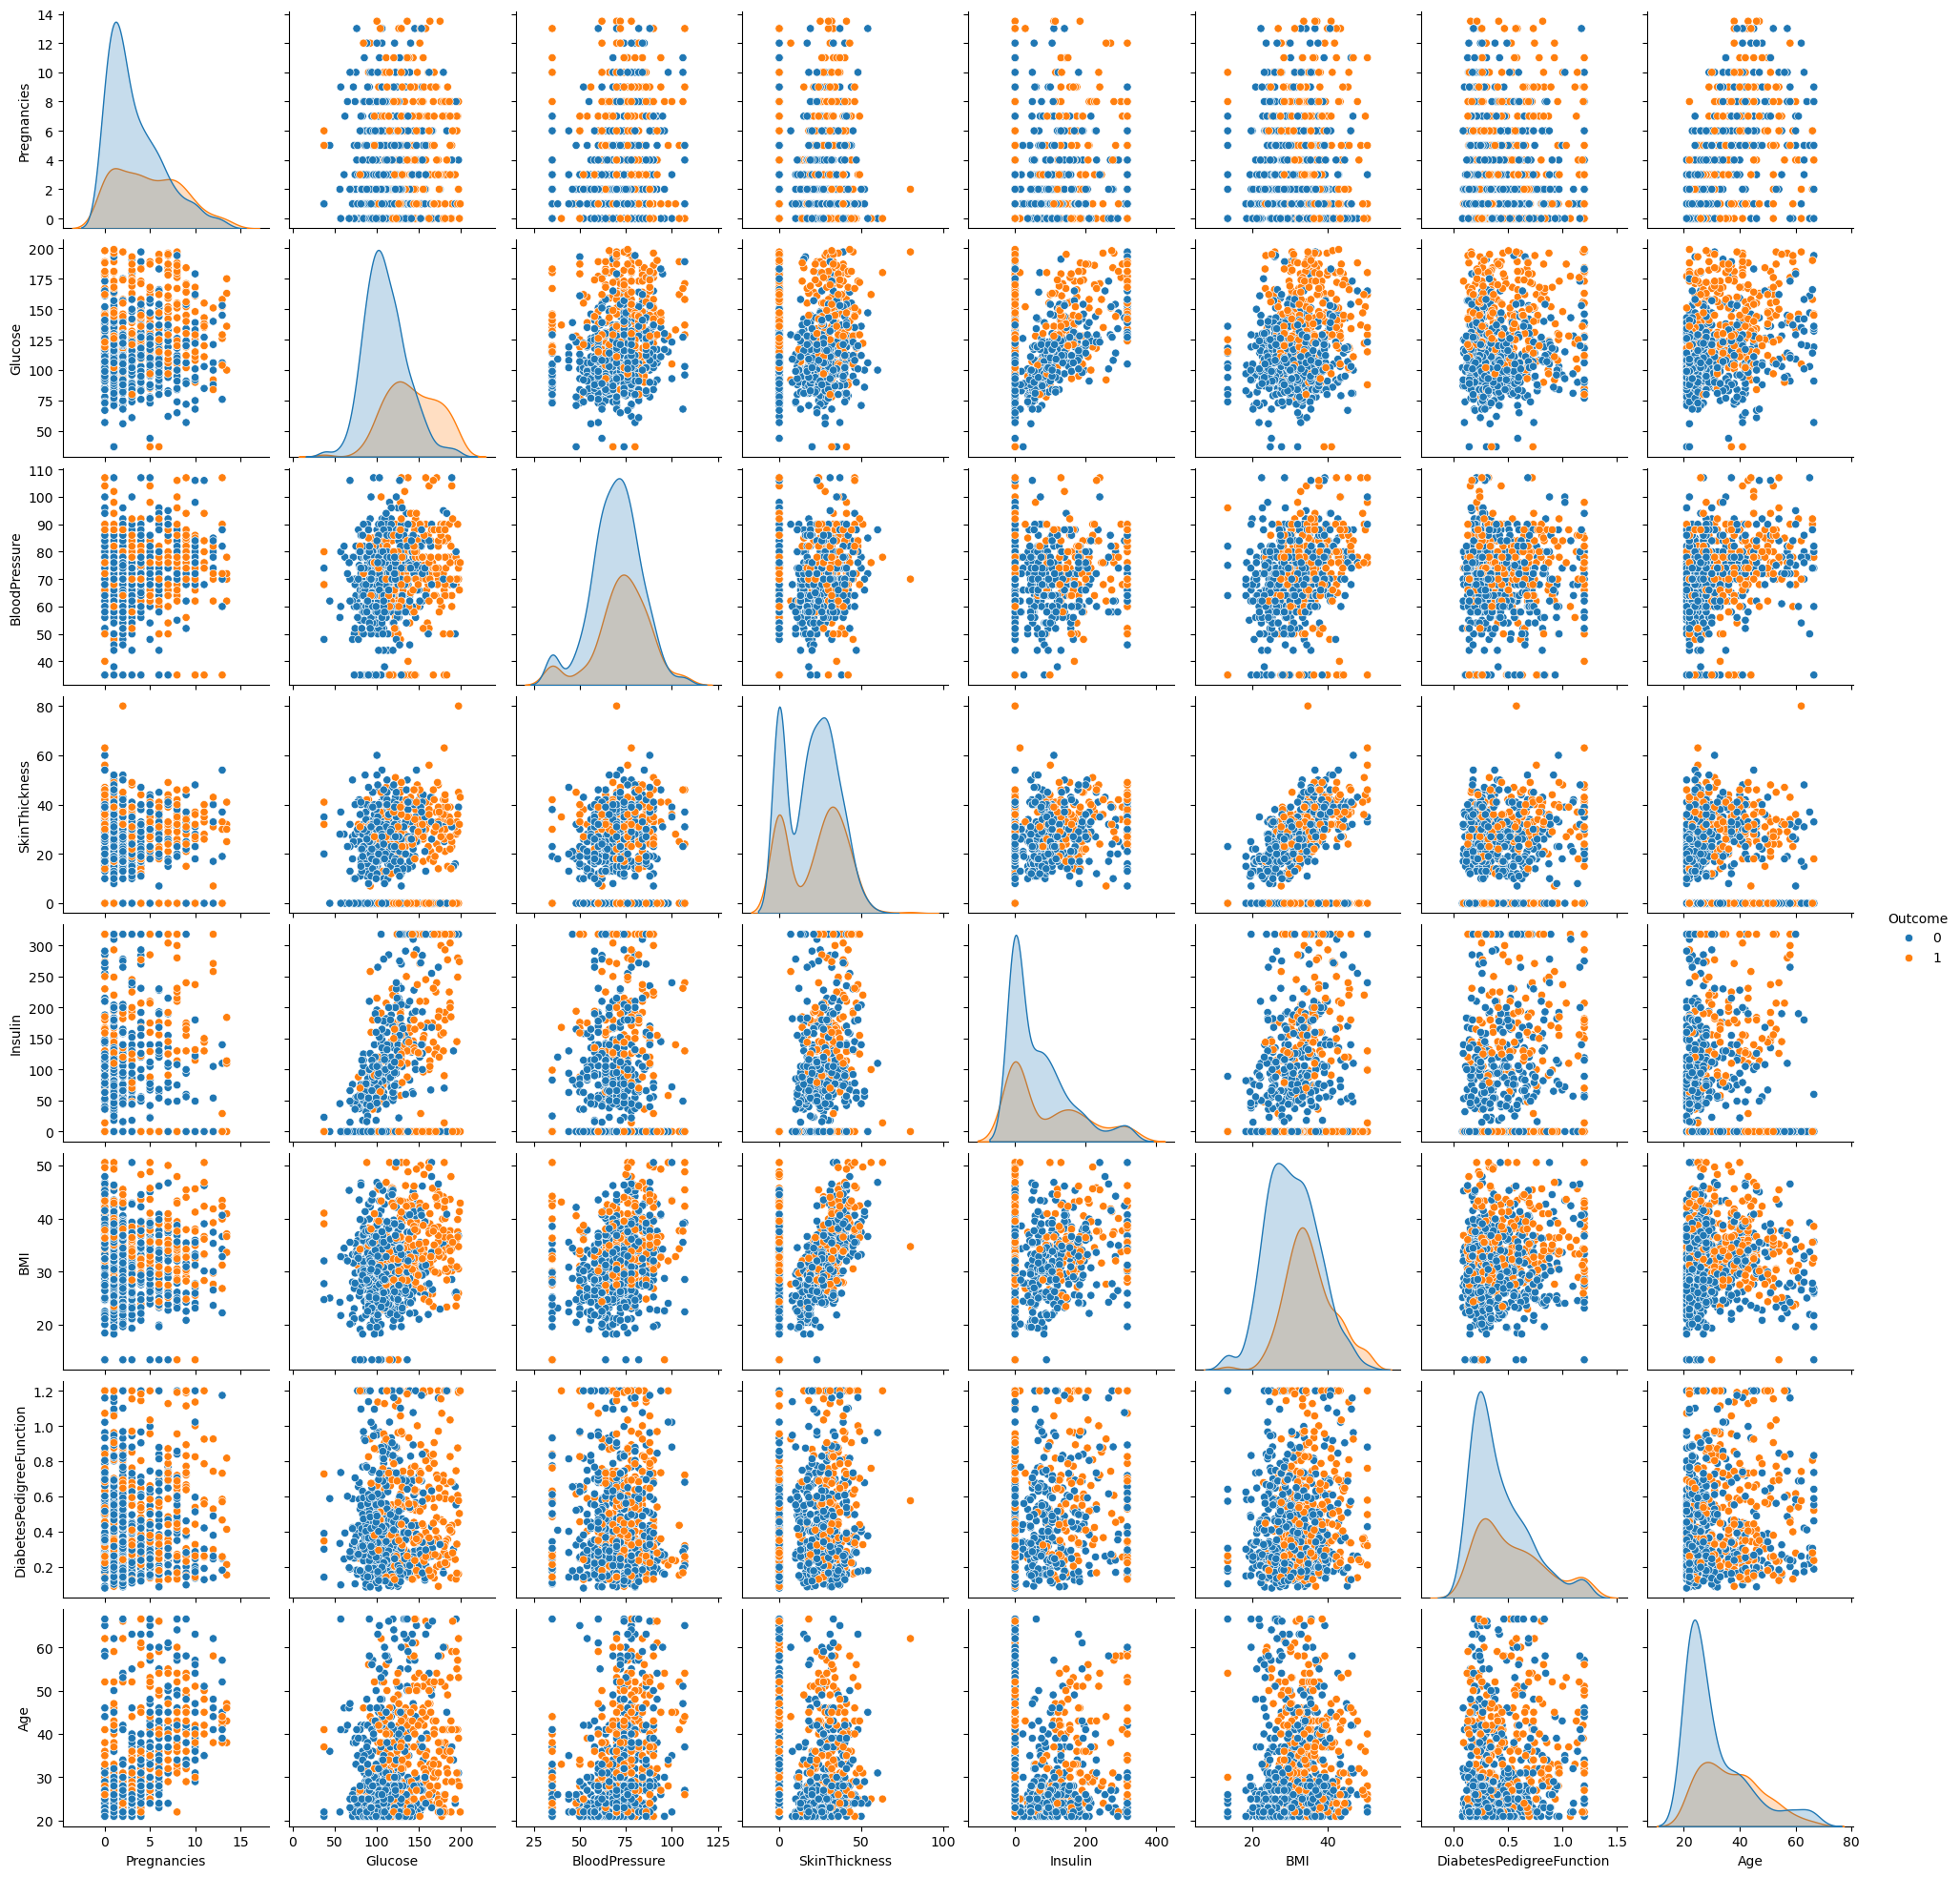

In [74]:
sns.pairplot(df,hue="Outcome")
plt.show()

In [75]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


In [76]:
# Pregnancies column is having postive relationship with Age,Glucose,BloodPressure,BMI,Outcome

In [77]:
# Glucose column is having positive relationship with Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome

In [78]:
# BloodPressure	is having positive relationship with Pregnancies, Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome	

In [79]:
# SkinThickness is having positive relationship with Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome	

In [80]:
# Insulin is having positive relationship with Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome

In [81]:
# BMI is having positive relationship with Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome

In [82]:
# DiabetesPedigreeFunction is having positive relationship with Glucose,SkinThickness,Insulin,BMI,Age,Outcome

In [83]:
# Age is having positive relationship with Pregnancies, Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome

In [84]:
# outcome is having positive relationship with Pregnancies, Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age

In [85]:
#2. Data Preprocessing:
#a. Handle missing values (e.g., imputation).

In [86]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
# There are no missing values in the given data set.

In [88]:
#b. Encode categorical variables.

In [89]:
# There are no categorical X variables in the given data set and there is only target variable which is categorical but is already encoded to binary 

In [90]:
# It requries standardization
df_cont= df[df.columns[[0,1,2,3,4,5,6,7]]]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scaled=ss.fit_transform(df_cont)
df_scaled=pd.DataFrame(df_scaled,columns=df_cont.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,-0.549746,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,0.347926,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,-0.848970,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [91]:
#3. Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [92]:
X= df_scaled

In [93]:
Y= df[df.columns[[8]]]

In [94]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [96]:
#b. Train the model using the training data.
# fitting the model
model.fit(X_train,Y_train)

C:\Users\andeb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [97]:
# predict the training data 
Y_pred_train= model.predict(X_train)

In [98]:
# predicting the testing data
Y_pred_test= model.predict(X_test)

In [99]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [100]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y_test,Y_pred_test)
print(f"The Accuracy for the testing data is {round(accuracy,2)}")

The Accuracy for the testing data is 0.75


In [101]:
#precision
from sklearn.metrics import precision_score
precision = precision_score(Y_test,Y_pred_test)
print(f"The precision for the testing data is {round(precision,2)}")

The precision for the testing data is 0.65


In [102]:
#recall
from sklearn.metrics import recall_score
recall= recall_score(Y_test,Y_pred_test)
print(f"The recall for the testing data is {round(recall,2)}")

The recall for the testing data is 0.65


In [103]:
#rF1_score
from sklearn.metrics import f1_score
f1_score= f1_score(Y_test,Y_pred_test)
print(f"The f1_score for the testing data is {round(f1_score,2)}")

The f1_score for the testing data is 0.65


In [104]:
#ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score= roc_auc_score(Y_test,Y_pred_test)
print(f"The roc_auc_score for the testing data is {round(roc_auc_score,2)}")

The roc_auc_score for the testing data is 0.73


In [105]:
#Visualize the ROC curve.
from sklearn.metrics import roc_curve
(tpr,fpr,dummy)= roc_curve(Y_test,Y_pred_test)

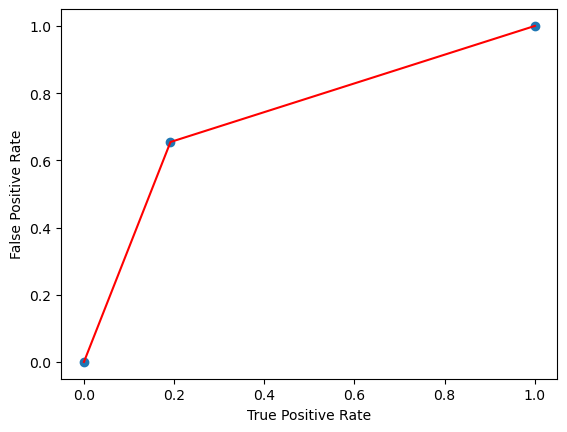

In [106]:
import matplotlib.pyplot as plt
plt.scatter(tpr,fpr)
plt.plot(tpr,fpr,color='red')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

In [107]:
#5. Interpretation:
#a. Interpret the coefficients of the logistic regression model.

In [108]:
coefficients=pd.DataFrame({
    "column Names": X.columns,
    "coefficients": model.coef_.ravel()    
})

In [109]:
print(coefficients)

               column Names  coefficients
0               Pregnancies      0.200366
1                   Glucose      1.088289
2             BloodPressure     -0.249305
3             SkinThickness      0.036520
4                   Insulin     -0.218544
5                       BMI      0.777954
6  DiabetesPedigreeFunction      0.284662
7                       Age      0.449256


In [110]:
#b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [111]:
# Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,as these columns having positive coefficients when these values increases 
# there is a change of occuring outcome as 1
# BloodPressure,Insulin, these columns having negative coefficients when these values decreases there is a chance of occuring outcome as 0.

In [112]:
#6. Deployment with Streamlit:
#In this task, you will deploy your logistic regression model using Streamlit.
#The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python 
#that involves loading your trained model and setting up user inputs for predictions. 

In [113]:
import joblib
joblib.dump(model,"logistic_model.pkl")
joblib.dump(ss,'scaler.pkl')

['scaler.pkl']

In [114]:
#Create a Streamlit App File (app.py)

In [115]:
joblib.load("logistic_model.pkl")

LogisticRegression()

In [ ]:
#Interview Questions:
#1. What is the difference between precision and recall?
#2. What is cross-validation, and why is it important in binary classification?

In [ ]:
#1. What is the difference between precision and recall?
# Recall or Sensitivity: From overall postivies how much our model is successfully predicting them as postivies.
# Precision: From overall model predicted postives ,how much percentage is real postives.

In [ ]:
#2. What is cross-validation, and why is it important in binary classification?
# Cross-validation means when we are fitting our model sometimes we do not get good accuracy scores because of the random state in data partition.
# our results or score may alter and it can be a baised report,so to overcome this we apply cross validation.So we get better result whenever we test.
# There are three types of cross validations and they are shuffle split cross validation,stratified cross validation and k-fold cross validation.
# why is it important in binary classification?
# Prevents overfitting,for binary class it often prevents the model from biasing toward the majority class.